In [7]:
import numpy as np
import pandas as pd
from pandas.api.types import CategoricalDtype
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures

### All Donations

In [9]:
food_full = pd.read_csv("food_full.csv")
food_full["date"] = pd.to_datetime(food_full["date"])
food_full["size"] = food_full["size"].astype("str")
food_full.loc[(food_full["state"] != "California") & (food_full["state"] != "New York"), "state"] = "underdeveloped"
company_num_donation = food_full.groupby("company")["company"].count()
company_one_donation = (company_num_donation == 1).astype("int")
company_size = food_full.groupby("company")["size"].first()
company_type = food_full.groupby("company")["type"].first()
company_state = food_full.groupby("company")["state"].first()
company_full = pd.DataFrame({
                        "size": company_size, "type": company_type,
                      
                        "one_donation": company_one_donation, 
                        "state": company_state
                       })
#company["top_contributor"] = company["num_donation"].apply(lambda x: 1 if x >= 50
#                                                          else 0)
#company.loc[company.index == "Imgur", "popular_weekday"] = "Friday"
#company = company[~(company.index == "Curiodysse")]

In [275]:
pd.get_dummies(company_full).to_csv("company_full_ohe.csv", sep = ",")

In [276]:
company_full.to_csv("company_full.csv", sep = ",")

In [277]:
food.groupby("company")["date"].agg(np.min).dt.month.value_counts()

6     34
7     21
3     19
1     17
11    16
8     15
4     15
9     14
10    13
2     13
12     8
5      8
Name: date, dtype: int64

In [261]:
food_full.type.value_counts()

applied       983
food          763
comm          724
bus           489
soft          447
fin           436
web           324
edu-health    290
other         204
sale           93
Name: type, dtype: int64

In [262]:
#for all companies that made a donation 
food = food_full
food["date"] = pd.to_datetime(food["date"])
food["size"] = food["size"].astype("str")
food.loc[(food["state"] != "California") & (food["state"] != "New York"), "state"] = "underdeveloped"
company_weeks = food.groupby("company")["date"].agg(lambda x:int((max(x) - min(x))/np.timedelta64(1, "W")))+ 1 
company_tot_donation = food.groupby("company")["pounds"].agg(np.sum)
company_num_donation = food.groupby("company")["company"].count()
company_one_donation = (company_num_donation == 1).astype("int")
company_pound_per_week = company_tot_donation/company_weeks
company_avg_donation = company_tot_donation/company_num_donation
company_max_donation = food.groupby("company")["pounds"].agg(np.max)
company_min_donation = food.groupby("company")["pounds"].agg(np.min)
#company_med_donation = food.groupby("company")["pounds"].agg(np.median)
company_size = food.groupby("company")["size"].first()
company_type = food.groupby("company")["type"].first()
company_state = food.groupby("company")["state"].first()
company_most_donation_weekday = food.groupby("company")["weekday"].agg(lambda x: np.argmax(x.value_counts()))
company_most_donation_weekday_frac = food.groupby("company")["weekday"].agg(lambda x: np.max(x.value_counts()))/company_num_donation
company_max_weekday = food.loc[food.reset_index().groupby("company")["pounds"].idxmax()]["weekday"]
company_max_weekday.index = company_weeks.index
company_first_donation = food.loc[food.reset_index().groupby("company")["date"].idxmin()]["pounds"]
company_first_donation.index = company_weeks.index
company_last_donation_weeks = (np.max(food["date"]) - food.groupby("company")["date"].agg(np.max)).apply(lambda x: x.days)//7
company_last_donation = food[food.groupby("company").date.transform("max") == food["date"]].groupby("company").first()["pounds"]
company_most_donation_month = food.groupby("company")["month"].agg(lambda x: np.argmax(x.value_counts())).astype("str")
company_most_donation_month_frac = food.groupby("company")["month"].agg(lambda x: np.max(x.value_counts()))/company_num_donation
company_start_month = food.groupby("company")["date"].agg(np.min).apply(pd.to_datetime).apply(lambda x: x.strftime("%B-%Y"))
company = pd.DataFrame({#"tot_donation": company_tot_donation, 
                       #"num_donation": company_num_donation, 
                       # "num_weeks": company_weeks, 
                       #"last_donation_weeks": company_last_donation_weeks,
                       # "last_donation": company_last_donation,
                        #"avg_donation": company_avg_donation, 
                        #"week_donation": company_pound_per_week,
                       # "max_donation": company_max_donation, 
                        "first_donation": company_first_donation,
                       # "min_donation": company_min_donation,
                        "size": company_size, 
                        "type": company_type,
                       "popular_weekday": company_most_donation_weekday,
                       # "popular_month": company_most_donation_month,
                       #"popular_weekday_frac": company_most_donation_weekday_frac,
                       # "popular_month_frac": company_most_donation_month_frac,
                       #"max_pound_weekday": company_max_weekday, 
                        #"start_month": company_start_month,
                        "multi_donor": 1 -  company_one_donation, 
                        "state": company_state
                       })
#top_contributors =  company[company["num_donation"]/company["num_weeks"] >=1].index
#company["top_contributor"] = company.index.isin(top_contributors).astype("int")
#company = company.loc[~(company.index == "Imgur"), :]
#company = company[~(company.index == "Curiodysse")]

c:\users\jordan fan\anaconda3\envs\toxic\lib\site-packages\numpy\core\fromnumeric.py:57: FutureWarning: 'argmax' is deprecated. Use 'idxmax' instead. The behavior of 'argmax' will be corrected to return the positional maximum in the future. Use 'series.values.argmax' to get the position of the maximum now.
  return getattr(obj, method)(*args, **kwds)


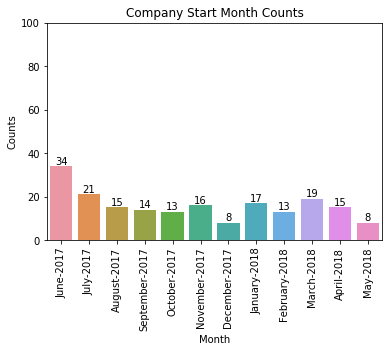

In [263]:
ax = sns.countplot(company["start_month"].apply(pd.to_datetime).sort_values().apply(lambda x: x.strftime("%B-%Y")));
ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation = 90);
for patch in ax.patches:
    x = patch.get_bbox().get_points()[:, 0]
    y = patch.get_bbox().get_points()[1, 1]
    ax.annotate(f'{int(y)}', (x.mean(), y), ha='center', va='bottom')
ax.set_ylim(0, 100);
plt.xlabel("Month");
plt.ylabel("Counts")
plt.title("Company Start Month Counts");

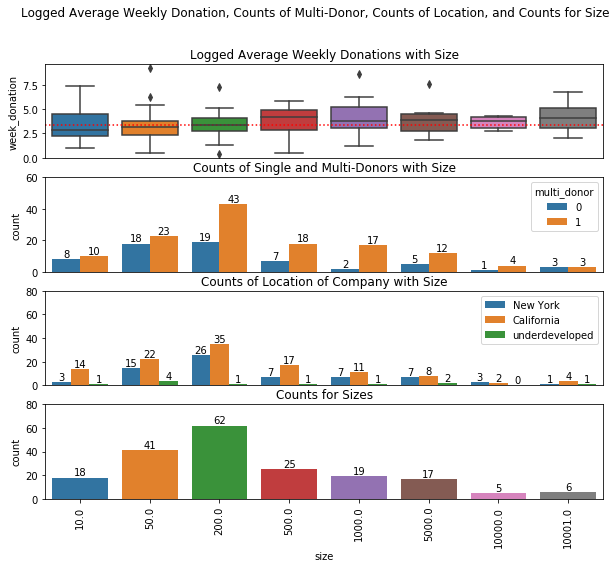

In [265]:
fig, axs = plt.subplots(figsize = (10,8), nrows=4)

sns.boxplot(
    x= company["size"].astype("float").sort_values(),
    y= np.log(company["week_donation"]),
    ax=axs[0]
)

sns.countplot(
    x = company["size"].astype("float").sort_values(),
    hue = company["multi_donor"],
    ax = axs[1]
)

sns.countplot(
    x = company["size"].astype("float").sort_values(),
    hue = company["state"],
    ax = axs[2]
)

sns.countplot(
    x= company["size"].astype("float").sort_values(),
    ax=axs[3]
)

# Draw median price
axs[0].axhline(
    y= np.log(company["week_donation"]).median(), 
    color='red',
    linestyle='dotted'
)

# Label the bars with counts
for patch in axs[3].patches:
    x = patch.get_bbox().get_points()[:, 0]
    y = patch.get_bbox().get_points()[1, 1]
    axs[3].annotate(f'{int(y)}', (x.mean(), y), ha='center', va='bottom')

for patch in axs[2].patches:
    x = patch.get_bbox().get_points()[:, 0]
    y = patch.get_bbox().get_points()[1, 1]
    if np.isnan(y):
        y = 0
    axs[2].annotate(f'{int(y)}', (x.mean(), y), ha='center', va='bottom')
    
for patch in axs[1].patches:
    x = patch.get_bbox().get_points()[:, 0]
    y = patch.get_bbox().get_points()[1, 1]
    axs[1].annotate(f'{int(y)}', (x.mean(), y), ha='center', va='bottom')

axs[3].set_xticklabels(axs[2].xaxis.get_majorticklabels(), rotation=90)
axs[3].set_ylim(0, 80)
axs[2].set_ylim(0, 80)
axs[1].set_ylim(0, 60)
axs[0].set_title("Logged Average Weekly Donations with Size")
axs[1].set_title("Counts of Single and Multi-Donors with Size")
axs[2].set_title("Counts of Location of Company with Size")
axs[3].set_title("Counts for Sizes")
axs[0].xaxis.set_visible(False)
axs[1].xaxis.set_visible(False)
axs[2].xaxis.set_visible(False)
axs[2].legend(loc = 1)
# Narrow the gap between the plots
plt.subplots_adjust(hspace=0.2)
plt.suptitle("Logged Average Weekly Donation, Counts of Multi-Donor, Counts of Location, and Counts for Size");

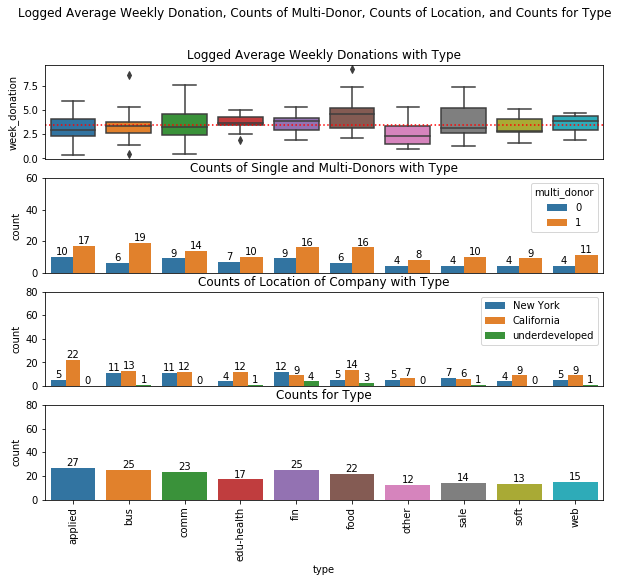

In [266]:
fig, axs = plt.subplots(figsize = (10,8), nrows=4)

sns.boxplot(
    x= company["type"].sort_values(),
    y= np.log(company["week_donation"]),
    ax=axs[0]
)

sns.countplot(
    x = company["type"].sort_values(),
    hue = company["multi_donor"],
    ax = axs[1]
)

sns.countplot(
    x = company["type"].sort_values(),
    hue = company["state"],
    ax = axs[2]
)

sns.countplot(
    x= company["type"].sort_values(),
    ax=axs[3]
)

# Draw median price
axs[0].axhline(
    y= np.log(company["week_donation"]).median(), 
    color='red',
    linestyle='dotted'
)

# Label the bars with counts
for patch in axs[3].patches:
    x = patch.get_bbox().get_points()[:, 0]
    y = patch.get_bbox().get_points()[1, 1]
    axs[3].annotate(f'{int(y)}', (x.mean(), y), ha='center', va='bottom')

for patch in axs[2].patches:
    x = patch.get_bbox().get_points()[:, 0]
    y = patch.get_bbox().get_points()[1, 1]
    if np.isnan(y):
        y = 0
    axs[2].annotate(f'{int(y)}', (x.mean(), y), ha='center', va='bottom')
    
for patch in axs[1].patches:
    x = patch.get_bbox().get_points()[:, 0]
    y = patch.get_bbox().get_points()[1, 1]
    axs[1].annotate(f'{int(y)}', (x.mean(), y), ha='center', va='bottom')

axs[3].set_xticklabels(axs[2].xaxis.get_majorticklabels(), rotation=90)
axs[3].set_ylim(0, 80)
axs[2].set_ylim(0, 80)
axs[1].set_ylim(0, 60)
axs[0].set_title("Logged Average Weekly Donations with Type")
axs[1].set_title("Counts of Single and Multi-Donors with Type")
axs[2].set_title("Counts of Location of Company with Type")
axs[3].set_title("Counts for Type")
axs[0].xaxis.set_visible(False)
axs[1].xaxis.set_visible(False)
axs[2].xaxis.set_visible(False)
axs[2].legend(loc = 1)
# Narrow the gap between the plots
plt.subplots_adjust(hspace=0.2)
plt.suptitle("Logged Average Weekly Donation, Counts of Multi-Donor, Counts of Location, and Counts for Type");

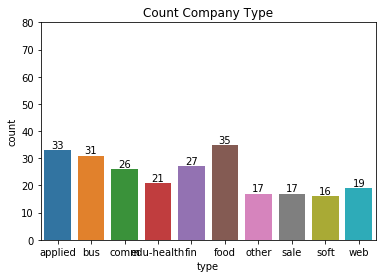

In [12]:
ax = sns.countplot(company_full["type"].sort_values())
for patch in ax.patches:
    x = patch.get_bbox().get_points()[:, 0]
    y = patch.get_bbox().get_points()[1, 1]
    ax.annotate(f'{int(y)}', (x.mean(), y), ha='center', va='bottom')
ax.set_ylim(0, 80);
plt.title("Count Company Type");

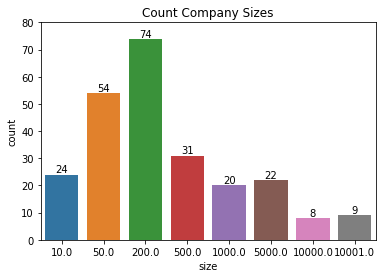

In [9]:
ax = sns.countplot(company_full["size"].astype("float"))
for patch in ax.patches:
    x = patch.get_bbox().get_points()[:, 0]
    y = patch.get_bbox().get_points()[1, 1]
    ax.annotate(f'{int(y)}', (x.mean(), y), ha='center', va='bottom')
ax.set_ylim(0, 80);
plt.title("Count Company Sizes");

### Companies with Recorded Pounds

In [17]:
#for all companies that made a donation 
food = pd.read_csv("no_isf_outliers")
food["date"] = pd.to_datetime(food["date"])
food["size"] = food["size"].astype("str")
food.loc[(food["state"] != "California") & (food["state"] != "New York"), "state"] = "underdeveloped"
company_weeks = food.groupby("company")["date"].agg(lambda x:int((max(food["date"]) - min(x))/np.timedelta64(1, "W")))+ 1 
company_tot_donation = food.groupby("company")["pounds"].agg(np.sum)
company_num_donation = food.groupby("company")["company"].count()
company_one_donation = (company_num_donation == 1).astype("int")
company_pound_per_week = company_tot_donation/company_weeks
company_avg_donation = company_tot_donation/company_num_donation
company_max_donation = food.groupby("company")["pounds"].agg(np.max)
company_min_donation = food.groupby("company")["pounds"].agg(np.min)
#company_med_donation = food.groupby("company")["pounds"].agg(np.median)
company_size = food.groupby("company")["size"].first()
company_type = food.groupby("company")["type"].first()
company_state = food.groupby("company")["state"].first()
company_most_donation_weekday = food.groupby("company")["weekday"].agg(lambda x: np.argmax(x.value_counts()))
company_most_donation_weekday_frac = food.groupby("company")["weekday"].agg(lambda x: np.max(x.value_counts()))/company_num_donation
company_max_weekday = food.loc[food.reset_index().groupby("company")["pounds"].idxmax()]["weekday"]
company_max_weekday.index = company_weeks.index
company_first_donation = food.loc[food.reset_index().groupby("company")["date"].idxmin()]["pounds"]
company_first_donation.index = company_weeks.index
company_last_donation_weeks = (np.max(food["date"]) - food.groupby("company")["date"].agg(np.max)).apply(lambda x: x.days)//7
company_last_donation = food[food.groupby("company").date.transform("max") == food["date"]].groupby("company").first()["pounds"]
company_most_donation_month = food.groupby("company")["month"].agg(lambda x: np.argmax(x.value_counts())).astype("str")
company_most_donation_month_frac = food.groupby("company")["month"].agg(lambda x: np.max(x.value_counts()))/company_num_donation
company_start_month = pd.to_datetime(food.groupby("company")["date"].agg(np.min)).dt.month.astype("str")
company = pd.DataFrame({#"tot_donation": company_tot_donation, 
                       #"num_donation": company_num_donation, 
                       # "num_weeks": company_weeks, 
                       #"last_donation_weeks": company_last_donation_weeks,
                        #"last_donation": company_last_donation,
                        "avg_donation": company_avg_donation, 
                        "week_donation": company_pound_per_week,
                        #"max_donation": company_max_donation, 
                       # "med_donation": company_med_donation,
                       # "min_donation": company_min_donation,
                        "size": company_size, "type": company_type,
                      # "popular_weekday": company_most_donation_weekday,
                       # "popular_month": company_most_donation_month,
                       #"popular_weekday_frac": company_most_donation_weekday_frac,
                        #"popular_month_frac": company_most_donation_month_frac,
                       #"max_pound_weekday": company_max_weekday, 
                        "start_month": company_start_month,
                        #"multi_donor": 1 -  company_one_donation, 
                        "state": company_state,
                        "first_donation": company_first_donation
                       })
#top_contributors =  company[company["num_donation"]/company["num_weeks"] >=1].index
#company["top_contributor"] = company.index.isin(top_contributors).astype("int")
#company = company.loc[~(company.index == "Imgur"), :]
#company = company[~(company.index == "Curiodysse")]

c:\users\jordan fan\anaconda3\envs\toxic\lib\site-packages\numpy\core\fromnumeric.py:57: FutureWarning: 'argmax' is deprecated. Use 'idxmax' instead. The behavior of 'argmax' will be corrected to return the positional maximum in the future. Use 'series.values.argmax' to get the position of the maximum now.
  return getattr(obj, method)(*args, **kwds)


In [18]:
company.head()

,avg_donation,first_donation,size,start_month,state,type,week_donation
company,,,,,,,
32BJ SEIU,27.000000,27.0,500.0,9,New York,other,0.750000
AT&T Foundry,14.947368,47.0,50.0,3,California,comm,25.818182
Acxiom,26.250000,50.0,5000.0,2,New York,bus,5.833333
"Adams & Company Real Estate, LLC",72.625000,43.0,200.0,12,New York,fin,23.240000
"Addepar, Inc.",95.875000,200.0,500.0,2,New York,fin,51.133333


In [19]:
company.to_csv("company_regression.csv", sep = ",")

In [11]:
#company.to_csv("no_outliers_with_donation.csv", sep = ",")

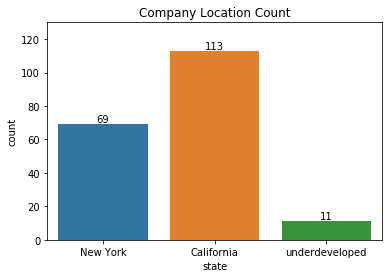

In [271]:
ax = sns.countplot(company["state"]);
for patch in ax.patches:
    x = patch.get_bbox().get_points()[:, 0]
    y = patch.get_bbox().get_points()[1, 1]
    ax.annotate(f'{int(y)}', (x.mean(), y), ha='center', va='bottom')
ax.set_ylim(0, 130);
plt.title("Company Location Count");

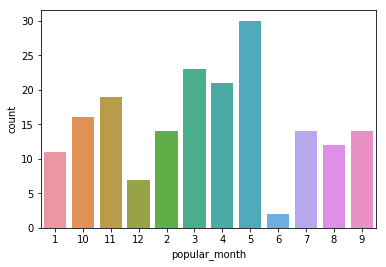

In [11]:
sns.countplot(company["popular_month"])

In [12]:
company.to_csv("company_with_donation.csv", sep = ",")

In [49]:
pd.get_dummies(company).to_csv("company_with_donation_ohe.csv", sep = ",")

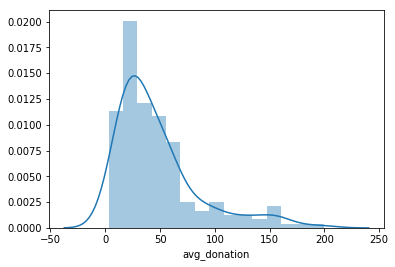

In [49]:
sns.distplot(company[company["avg_donation"] <=200]["avg_donation"])

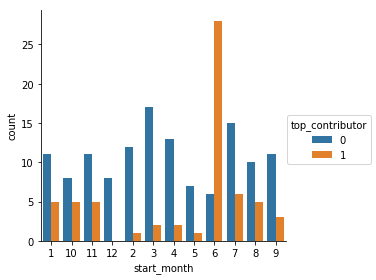

In [9]:
sns.factorplot(x = "start_month", hue = "top_contributor", data = company, kind = "count")

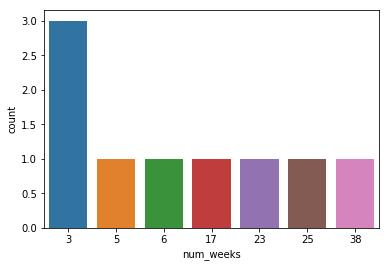

In [10]:
sns.countplot(company[(company["num_donation"] == 3)]["num_weeks"])